In [4]:
import os
import torch
from torch.utils.data import Dataset
from pathlib import Path

class TorchTensorFolderDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = Path(root_dir)
        self.samples = []
        self.class_to_idx = {}
        self._prepare_file_list()

    def _prepare_file_list(self):
        for class_dir in sorted(self.root_dir.glob("*")):
            if not class_dir.is_dir():
                continue
            class_name = class_dir.name
            if class_name not in self.class_to_idx:
                self.class_to_idx[class_name] = len(self.class_to_idx)
            for file in class_dir.glob("*.pt"):
                self.samples.append((file, self.class_to_idx[class_name]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        tensor = torch.load(path, weights_only=True)
        return tensor, label


from torch.utils.data import DataLoader

# RAW dane
train_raw_dataset = TorchTensorFolderDataset(os.path.join(os.getcwd(),"data\\preprocessed\\raw\\train"))
train_raw_loader = DataLoader(train_raw_dataset, batch_size=16, shuffle=True)

# MEL dane
train_mel_dataset = TorchTensorFolderDataset(os.path.join(os.getcwd(),"data\\preprocessed\\mel\\train"))
train_mel_loader = DataLoader(train_mel_dataset, batch_size=16, shuffle=True)


In [6]:
for waveforms, labels in train_raw_loader:
    print("Waveform batch shape:", waveforms.shape)
    print("Labels:", labels)
    break

Waveform batch shape: torch.Size([16, 1, 16000])
Labels: tensor([14, 17,  5, 11, 11, 27, 13, 10, 29, 21, 24,  6, 29,  5, 21, 11])


In [5]:
for waveforms, labels in train_mel_loader:
    print("Waveform batch shape:", waveforms.shape)
    print("Labels:", labels)
    break

Waveform batch shape: torch.Size([16, 1, 64, 81])
Labels: tensor([28,  4, 12, 21, 20,  4, 26, 25, 16, 28, 26, 21, 22,  4, 12,  0])


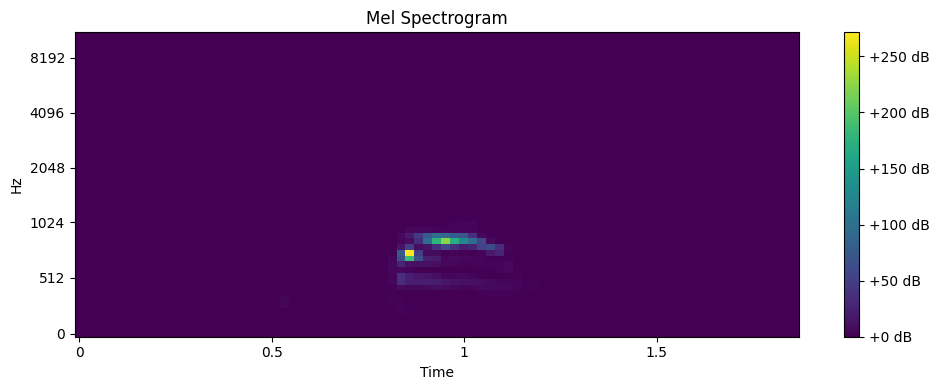

In [10]:
import torch
import matplotlib.pyplot as plt
import librosa.display

# Wczytanie pliku .pt
sample_path = os.path.join(os.getcwd(),"data","preprocessed","mel","train","bed","0a7c2a8d_nohash_0.pt")
mel_spec_batch = torch.load(sample_path, weights_only=True)  # Zastąp 'sciezka_do_pliku.pt' odpowiednią ścieżką

# Zakładając, że mel_spec_batch ma kształt [batch_size, num_mels, num_frames]
# Jeśli masz batch_size=1, wyciągnij mel-spectrogram dla tego jednego elementu
mel_spec = mel_spec_batch[0]  # Wyciąganie pierwszego (i jedynego) elementu batcha

# Przekształć tensor do numpy array, by użyć librosa do wizualizacji
mel_spec_numpy = mel_spec.numpy()

# Wizualizacja
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_numpy, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

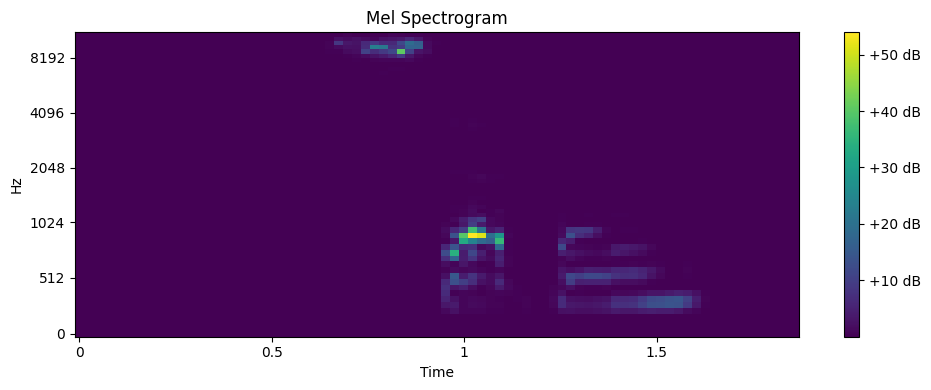

In [11]:
# Wczytanie pliku .pt
sample_path = os.path.join(os.getcwd(),"data","preprocessed","mel","train","seven","0a7c2a8d_nohash_0.pt")
mel_spec_batch = torch.load(sample_path, weights_only=True)  # Zastąp 'sciezka_do_pliku.pt' odpowiednią ścieżką

# Zakładając, że mel_spec_batch ma kształt [batch_size, num_mels, num_frames]
# Jeśli masz batch_size=1, wyciągnij mel-spectrogram dla tego jednego elementu
mel_spec = mel_spec_batch[0]  # Wyciąganie pierwszego (i jedynego) elementu batcha

# Przekształć tensor do numpy array, by użyć librosa do wizualizacji
mel_spec_numpy = mel_spec.numpy()

# Wizualizacja
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_numpy, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()
